# Pridict Project: Climate Change Classification
© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## Team Members
1. Oratile .

2. Xichavo .

3. Sandile Tsewu.

4. Mxolisi .

5. Antonia .

6. Spha .

7. Thabie .

<a id="cont"></a>
## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Preproccesing</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

### Predict Overview
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine:
- How people perceive climate change?
- Whether or not they believe it is a real threat?

This would add to their market research efforts in gauging how their product/service may be received.

### Problem statement
- EDSA is challenging you with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


<a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [3]:
# Libraries for data loading, data manipulation and data visulisation.
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pickle
%matplotlib inline
# Regular Expressions Library
import re 
pd.set_option("display.max_colwidth", 200)
# For text manipulation 
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *

<a id="three"></a>
## 3. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [4]:
# Load the data.
df_train = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/test_with_no_labels.csv')

<a id="four"></a>
## 4. Preprocessing
<a href=#cont>Back to Table of Contents</a>

<a id="five"></a>
## 5. Exploritory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

After the data cleaning step where we put our data into a few standard formats, we now do some analysis. It is very important to perform EDA before applying any feature engineering and algorithms in our data.

 We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machine learning techniques.

In [5]:
# Looking at the first five rows of the df_train
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


We have two features and one label

features includes: message and tweetid
label: sentiment

In [6]:
# Looking at the first five rows of the df_test
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


Test dataFrame contains only the features

We will look at the shape of the train dataframe to see the number of rows and the columns

In [7]:
# Checking the total number of rows and columns on our data.
df_train.shape

(15819, 3)

We have 15819 rows and 4 features on our new data set.

In [8]:
# Checking a detailed information about our data.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


This command shows us that out of the 15819 entries, there are no null values.
It also shows that we have the categorical and numerical features.

In [9]:
# Checking the null values
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This confirms that there are no null values in the data.

In [10]:
# Checking the tweetid to see if there are any duplicate id's
df_train['tweetid'].duplicated().sum()

0

We dont have any duplicates value from the tweetid column.

In [11]:
# Taking a closer look on the message column
df_train['message']

0        PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
1                                                                                      It's not like we lack evidence of anthropogenic global warming
2        RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3                                                 #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4                          RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight
                                                                             ...                                                                     
15814    RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care.

In [12]:
# Checking for unique values 
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

our new data has 4 unique label.

According to the description of data, here is what each value stands for:

1 Pro: the tweet supports the belief of man-made climate change

2 News: the tweet links to factual news about climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change

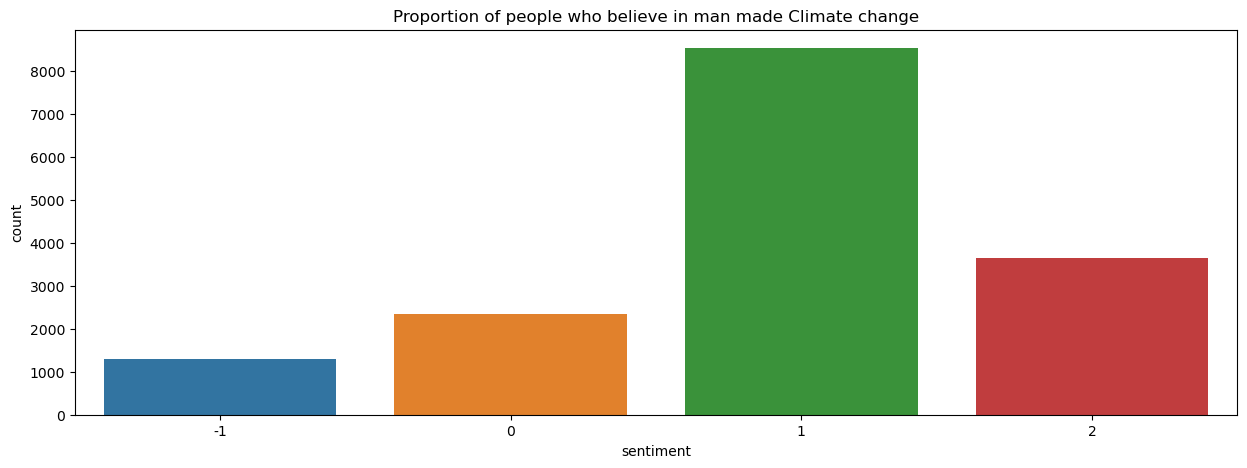

In [13]:
# Ploting the distribution of unique label values.
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="sentiment", data=df_train)
plt.title('Proportion of people who believe in man made Climate change')
plt.style.use('ggplot')
plt.show()

The sentiment shows that the highest proportion of the tweets supports the belief of man-made climate change.

The is an imbalance distribution on our label and that may led our model to overfit, therefore it's important to have a balanced label distribution to get a better performing model.

Creating WordCloud for all words we have in our data and creating seperate WordCloud for each sentiment.
NOTE: Some of the words/texts that appear on the wordcloud have been tokenized E.g Climate-> Climat.
Sentiment 1 Pro
Sentiment 2 News
Sentiment 0 Neutral
Sentiment -1 Anti

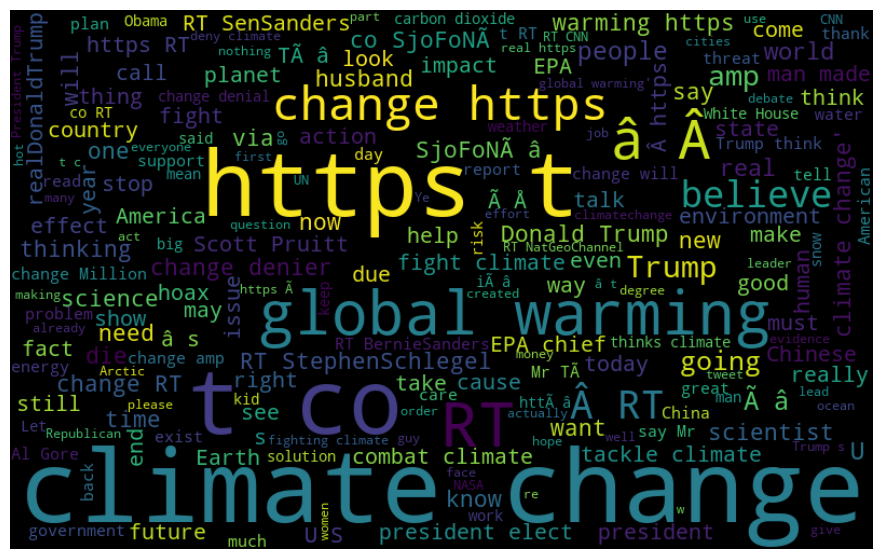

In [14]:
# Creating a wordcloud with all words we have in our message data.
all_words = ' '.join([text for text in df_train['message']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

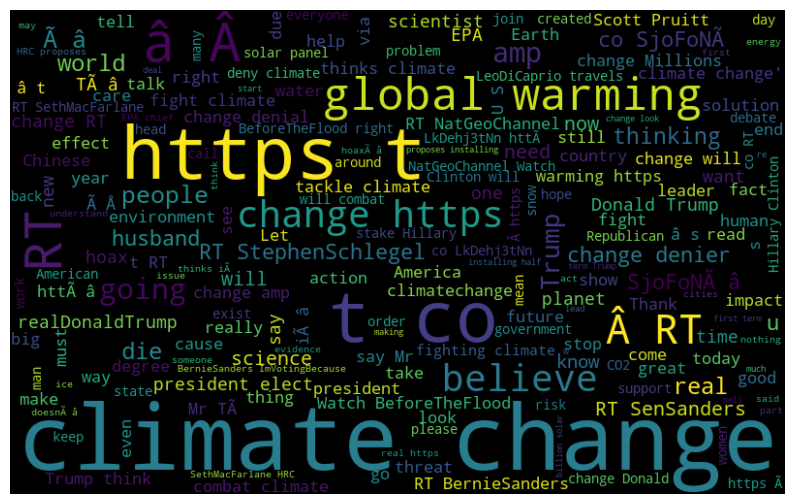

In [15]:
# Creating text for pro-climate change buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

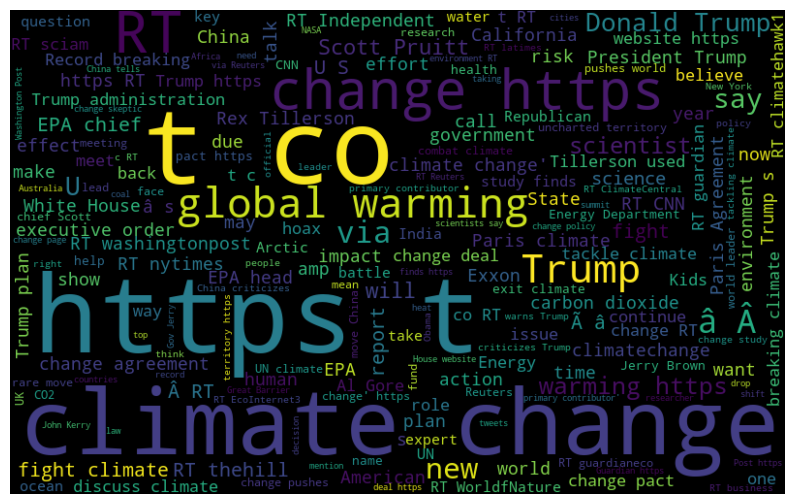

In [16]:
# Creating text for anti-clmate change buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

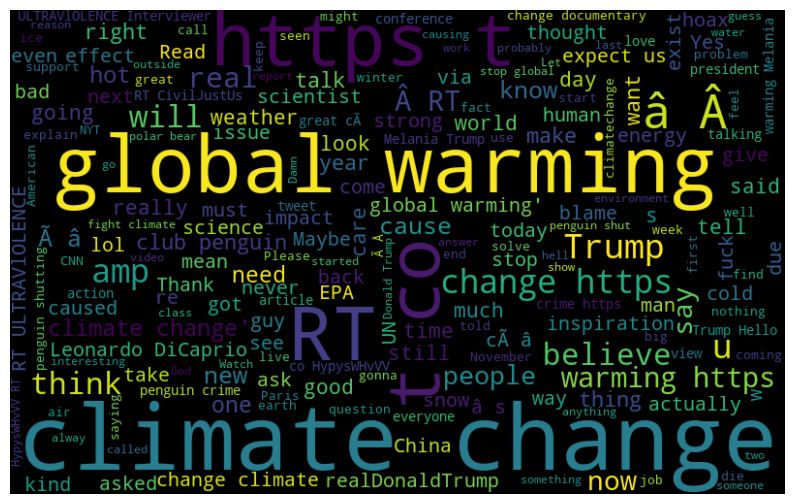

In [17]:
# Creating text from neutral buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

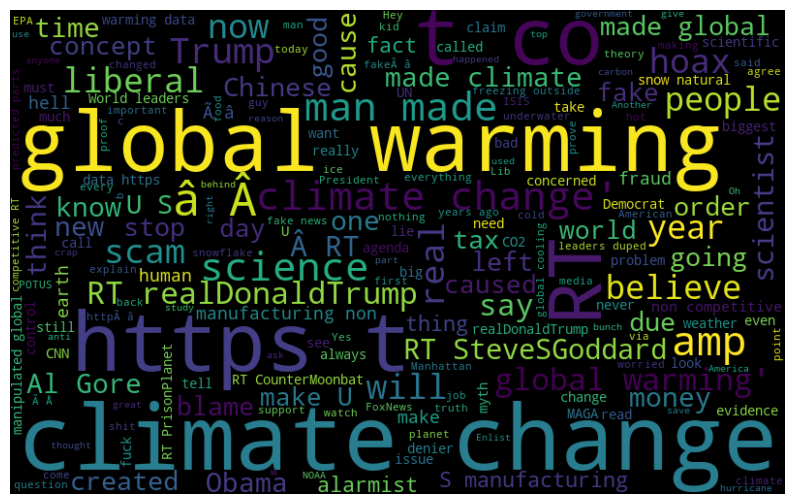

In [18]:
# Creating text from news buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

In [20]:
# Extracting Tweets from their sentiment
def hashtag_extract(tweet):
    # Creating a list that will hold all hashtags
    hashtags = []
    # Looping through the tweets to find all words that match the hashtag
    for i in tweet:
        ht = re.findall(r"#(\w+)",i)
    # Appending all words to the list which matches the hashtags
        hashtags.append(ht)
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    # Creating a data frame for all hashtags counts
    hashtag_df_train = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df_train = hashtag_df_train.nlargest(15, columns="count")

    return hashtag_df_train

Positive_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])
Negative_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 2])
Neutral_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])
News_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])
# After the extraction has been done we now view our data to check the count.
News_tweets.head()

,hashtag,count
30,MAGA,11
48,climate,10
12,Trump,7
72,climatechange,6
7,OpChemtrails,4


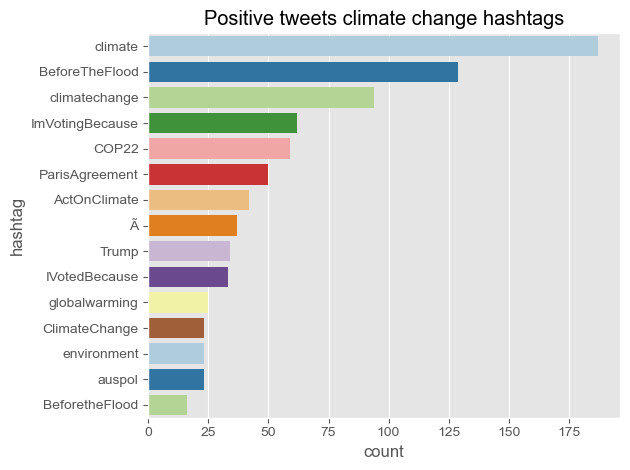

In [21]:
# Plotting the frequent hashtags for pro climate change classes.
sns.barplot(data = Positive_tweets,y = Positive_tweets['hashtag'], x = Positive_tweets['count'], palette=("Paired"))
plt.title('Positive tweets climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

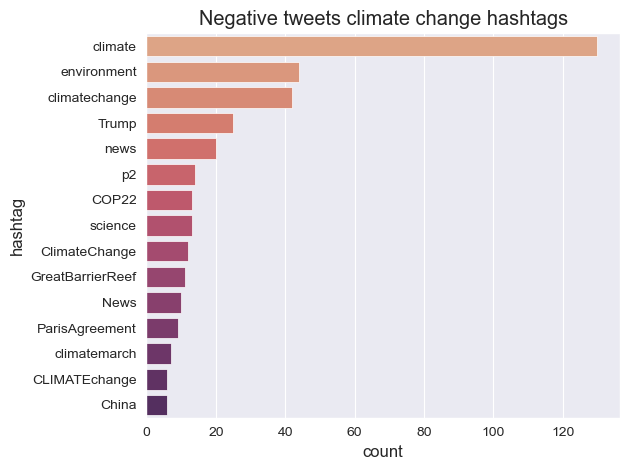

In [22]:
# Plotting the frequent hastags for anti climate change classes.
sns.barplot(data=Negative_tweets,y=Negative_tweets['hashtag'], x=Negative_tweets['count'], palette=("flare"))
plt.title('Negative tweets climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

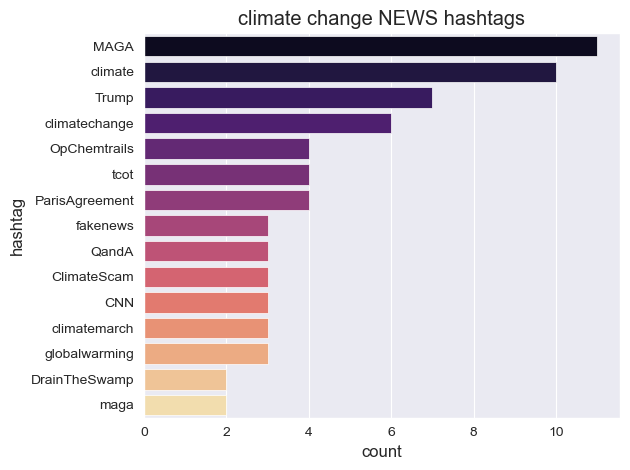

In [23]:
# Plotting the frequent hastags for news climate change classes.
sns.barplot(y= News_tweets['hashtag'], x= News_tweets['count'], palette=("magma"))
plt.title('climate change NEWS hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

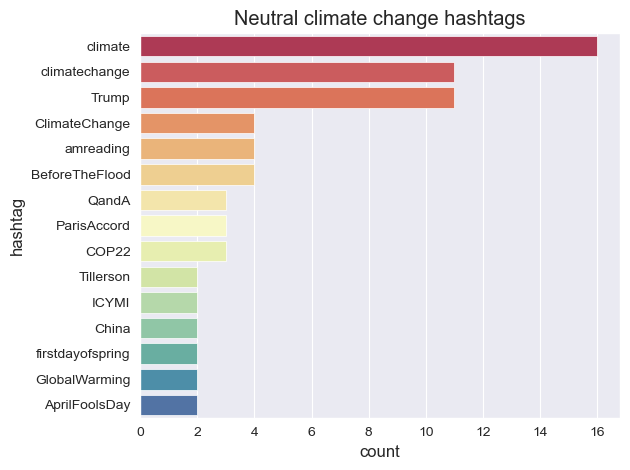

In [24]:
# Plotting the frequent hastags for neutral climate change classes.
sns.barplot(y=Neutral_tweets['hashtag'], x=Neutral_tweets['count'], palette=("Spectral"))
plt.title('Neutral climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

<a id="six"></a>
## 6. Modeling
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Perfomance
<a href=#cont>Back to Table of Contents</a>

<a id="eight"></a>
## 8. Model Explanation
<a href=#cont>Back to Table of Contents</a>